In [1]:
import numpy as np
from copy import deepcopy
from random import uniform
from matplotlib import *
from math import sin,cos,exp,sqrt,pi
import pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import time
import matplotlib.pyplot as plt

# 1. Notre fonction test : Holder table function

In [2]:
def holder_table(x1):
    """Arguments : 
    x1 : vecteur de dimension 2"""
    x = x1[0]
    y = x1[1]
    return -abs(sin(x)*cos(y)*exp(abs(1-(sqrt(x*x+y*y)/pi))))

## 1.1 Apperçu de notre fonction en 3D

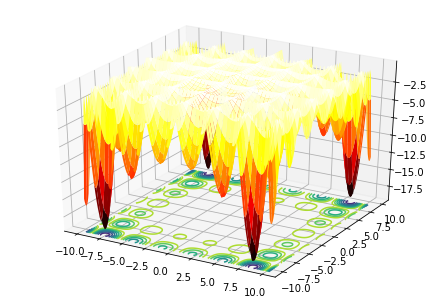

In [3]:
fig = plt.figure()
ax = Axes3D(fig)
x=np.arange(-10,10,0.1)
y=np.arange(-10,10,0.1)
x,y=np.meshgrid(x,y)
z=-abs(np.sin(x)*np.cos(y)*np.exp(abs(1-(np.sqrt(x*x+y*y)/np.pi))))
ax.contour(x, y, z, zdir="z", offset=-20) 
ax.plot_surface(x,y,z,cmap='hot', alpha = 1)
#pyplot.savefig('image.png', transparent = True)
plt.show()

## 1.2 Apperçu de notre fonction en 2D

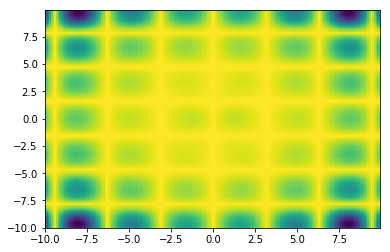

In [4]:
plt.pcolor(x,y,z)
#plt.savefig('graph2D')
plt.show()


# 2. Première fonction pour la recherche de minimum

Dans cette première fonction notre condition d'arrêt est seulement le fait d'être passé un certain nombre de fois dans la boucle.
De plus nous gardons l'inertie constante égale à 1.

In [5]:
def opt2(f,population,Nmax, phi1, phi2):
    """Arguments : 
        f : fonction dont on veut trouver un minimum
        population : Tableau de vecteur 
        Nmax : Nombre maximum de tour de boucle
        phi1 : Scalaire (influence du personnal best)
        phi2 : Scalaire (influence du global best)"""
    t = 0
    n,m = np.shape(population)
    global_best = population[0] 
    global_best_f = f(population[0])
    pos = np.zeros((n,1))
    
    #On initialise le personnal best à la population initiale 
    perso_best = deepcopy(population)
    perso_best_f = np.zeros((n,1))
    
    #On prend des vitesses initiales nulles
    vitesse = np.zeros((1,m))
    
    """Initialisation des personnal_best_f, global_best_f et du global best """
    for j in range(n):
        pos[j,0] = f(population[j])
        perso_best_f[j,0] = pos[j,0]
        #Recherche du global best
        if( perso_best_f[j,0] < global_best_f ):
            global_best = population[j]
            global_best_f = perso_best_f[j,0]
            
    """Traitement"""
    #On execute la boucle tant qu'on a pas fait Nmax tour de boucle
    while(t < Nmax):
        t = t+1
        u1=uniform(0,1)
        u2=uniform(0,1)
        for i in range(0,n):
            #Calcul de l'image du point
            pos[i,0]=f(population[i])
            
            #Mise à jour du personnal best s'il faut
            if(pos[i,0] < perso_best_f[i,0]):
                perso_best_f[i,0] = pos[i,0]
                perso_best[i] = population[i]
                
                #Mise à jour du global best s'il faut
                if(perso_best_f[i,0] < global_best_f):
                    global_best_f = perso_best_f[i,0]
                    global_best = population[i]
            #Calcul de la nouvelle vitesse
            k = np.array(perso_best[i]) - np.array(population[i])
            j = np.array(global_best) - np.array(population[i])
            a = np.array(phi1 * u1 * (k) + phi2 * u2 *j)
            vitesse = np.array(vitesse) + np.array(a)
            #Mise à jour de la position des points
            population[i] = np.array(population[i])+np.array(vitesse[0])
            population[i][0] = max(min(population[i][0], 10), -10)
            population[i][1] = max(min(population[i][1], 10), -10)
        i=0
    return global_best, global_best_f           

## 2.1 Test sur 5 points que nous choisissons

In [6]:
A = [[2.8,0.3],[6,-4],[8,8],[-2,0.3],[-9,-4]]
np.array(A)
print("resultats holder")
h1,h2 = opt2(holder_table,deepcopy(A), 50, 0.5,0.5)
print("coordonnées du minimum : ",h1)
print("valeur du minimum",h2)

resultats holder
coordonnées du minimum :  [-10. -10.]
valeur du minimum -15.140223856952055


Quand nous effectuons ce test plusieurs fois nous obtenons des valeurs très différentes, nous allons donc réaliser un autre test.

## 2.2 Test sur 300 points tirés aléatoirement

### 2.2.1 fonction qui initialise une population aléatoirement

In [7]:
def initialise_pop(n,inf,sup):
    """Arguments : 
    n : nombre de personnes dans notre population
    inf,sup : """
    Pop = []
    for i in range(n):
        x = [uniform(inf,sup),uniform(inf,sup)]
        Pop.append(x)
    return Pop

In [8]:
n = 300
Pop1 = initialise_pop(n,-10,10)

In [9]:
print("resultats holder")
t3 = time.time()
h1,h2 = opt2(holder_table,deepcopy(Pop1), 1000, 0.5,0.5)
t4 = time.time()-t3
print("coordonnées du minimum : ",h1)
print("valeur du minimum",h2)
print("temps mis par la fonction", t4, " secondes")

resultats holder
coordonnées du minimum :  [  8.05201218 -10.        ]
valeur du minimum -18.020707335270195
temps mis par la fonction 5.002465009689331  secondes


Lorsque on recompile les deux cellules précédentes plusieurs fois,on trouve toujours un minimum.

# 3. Condition d'arrêt avec le barycentre

## 3.1 Implémentation de la fonction

In [10]:
def barycentre(X):
    """Argument : 
    X : Un tableau de vecteur"""
    n,m = np.shape(X)
    sum_x = 0
    sum_y = 0
    for i in range(n):
        sum_x += X[i][0]
        sum_y += X[i][1]
    return np.array([sum_x/n, sum_y/n])

## 3.2 Test de la fonction barycentre :

In [11]:
A = [[1,1], [2,2]]
print(barycentre(A))

[1.5 1.5]


In [12]:
A = [[1,1], [0,1],[1,0],[0,0]]
print(barycentre(A))

[0.5 0.5]


## 3.3 Nouvelle fonction de recherche de minimum

In [112]:
def min_barycentre(f,population,Nmax, phi1, phi2,precision):
    """Arguments : 
        f : fonction dont on veut trouver un minimum
        population : Tableau de vecteur 
        Nmax : Nombre maximum de tour de boucle
        phi1 : Scalaire (influence du personnal best)
        phi2 : Scalaire (influence du global best)
        precision : seuil pour lequel on considère que le barycentre ne se déplace plus"""
    t = 0
    n,m = np.shape(population)
    global_best = population[0]
    global_best_f = f(population[0])
    pos = np.zeros((n,1))
    perso_best = deepcopy(population)
    perso_best_f = np.zeros((n,1))
    vitesse = np.zeros((1,m))
    #initialisation du barycentre et de l'erreur
    barycentre1 = barycentre(population)
    barycentre2 = [50,50]
    erreur = 1 # on met l'erreur a 1 pour être sur de faire le traitement au moins une fois
    
    """Initialisation"""
    for j in range(n):
        pos[j,0] = f(population[j])
        perso_best_f[j,0] = pos[j,0]
        if( perso_best_f[j,0] < global_best_f ):
            global_best = population[j]
            global_best_f = perso_best_f[j,0]
    
    """Traitement"""
    #On effectue le traitement tant que le barycentre ce déplace significativement
    # et qu'on a pas atteint le nombre maximum d'itérations autorisées
    while(t < Nmax and erreur > precision):
        t = t+1
        u1=uniform(0,1)
        u2=uniform(0,1)
        for i in range(0,n):
            
            pos[i,0]=f(population[i])
            if(pos[i,0] < perso_best_f[i,0]):
                perso_best_f[i,0] = pos[i,0]
                perso_best[i] = population[i]
                if(perso_best_f[i,0] < global_best_f):
                    global_best_f = perso_best_f[i,0]
                    global_best = population[i]
            k = np.array(perso_best[i]) - np.array(population[i])
            j = np.array(global_best) - np.array(population[i])
            a = np.array(phi1 * u1 * (k) + phi2 * u2 *j)
            vitesse = np.array(vitesse) + np.array(a)
            population[i] = np.array(population[i])+np.array(vitesse[0])
            population[i][0] = max(min(population[i][0], 10), -10)
            population[i][1] = max(min(population[i][1], 10), -10)
        i=0

        #Calcul du nouveau barycentre
        barycentre2 = barycentre(population)
        #Calcul du déplacement entre les deux barycentre
        erreur = np.linalg.norm(np.array(barycentre2) - np.array(barycentre1))
        #Mise à jour du barycentre
        barycentre1 = barycentre2
    return global_best, global_best_f,t

In [113]:
n = 300
Pop1 = initialise_pop(n,-10,10)
precision = 1e-3
Nmax = 1000
phi1 = 0.5
phi2 = 0.5

In [114]:
print("resultats holder")
t5 = time.time()
h1,h2,nb_iter = min_barycentre(holder_table,deepcopy(Pop1), Nmax, phi1,phi2, precision)
t6 = time.time()-t5
print("coordonnées du minimum : ",h1)
print("valeur du minimum",h2)
print("nombre de tour :", nb_iter)
print("temps mis par la fonction : ", t6)

resultats holder
coordonnées du minimum :  [8.119639366927924, 9.77299135956665]
valeur du minimum -19.04512257260214
nombre de tour : 3
temps mis par la fonction :  0.026506900787353516


# 4. Etude paramétrique

## 4.1 Influence de la taille de l'essaim sur la convergence

On va prendre les mêmes Nmax, $\phi1$ et $\phi2$ et précision pour tous les tests de cette partie

In [115]:
Nmax = 300
phi1 = 0.3
phi2 = 0.7
precision = 1e-7
inf = -10
sup = 10

### 4.1.1 Test de la méthode sur une petite population (10 individus) :

In [116]:
n = 10
pop1 = initialise_pop(n,inf,sup)

In [117]:
min_barycentre(holder_table,pop1,Nmax, phi1, phi2,precision)

(array([-8.26325973, 10.        ]), -17.594043032156748, 3)

### 4.1.2 Test sur une population de taille moyenne (100 individus): 

In [132]:
n = 100
pop2 = initialise_pop(n,inf,sup)

In [133]:
min_barycentre(holder_table,pop2,Nmax, phi1, phi2,precision)

([-8.13900327339779, 9.479654726299461], -18.809611788962695, 3)

### 4.1.3 Test sur une population de grande taille (300 individus) : 

In [134]:
n = 300
pop3 = initialise_pop(n, inf,sup)

In [135]:
min_barycentre(holder_table,pop3,Nmax, phi1, phi2,precision)

([-8.012030425729066, -9.657178968012428], -19.189760066685697, 3)

## 4.2 Etude de l'influence de l'inertie

### 4.2.1 Inertie constante

Nous allons faire une nouvelle fonction qui prend en paramètre w une constante qui va symboliser l'inertie.

In [23]:
def min_inertie(f,population,Nmax, phi1, phi2,précision,w):
    """Arguments : 
        f : fonction dont on veut trouver un minimum
        population : Tableau de vecteur 
        Nmax : Nombre maximum de tour de boucle
        phi1 : Scalaire (influence du personnal best)
        phi2 : Scalaire (influence du global best)
        precision : seuil pour lequel on considère que le barycentre ne se déplace plus
        w : scalaire qui représente l'inertie"""
    t = 0
    n,m = np.shape(population)
    global_best = population[0]
    global_best_f = f(population[0])
    pos = np.zeros((n,1))
    perso_best = deepcopy(population)
    perso_best_f = np.zeros((n,1))
    vitesse = np.zeros((1,m))
    barycentre1 = barycentre(population)
    barycentre2 = [0,0]
    erreur = 1
    """Initialisation"""
    for j in range(n):
        pos[j,0] = f(population[j])
        perso_best_f[j,0] = pos[j,0]
        if( perso_best_f[j,0] < global_best_f ):
            global_best = population[j]
            global_best_f = perso_best_f[j,0]
    
    """Traitement"""
    while(t < Nmax and erreur > precision):
        t = t+1
        u1=uniform(0,1)
        u2=uniform(0,1)
        for i in range(0,n):
            
            pos[i,0]=f(population[i])
            if(pos[i,0] < perso_best_f[i,0]):
                perso_best_f[i,0] = pos[i,0]
                perso_best[i] = population[i]
                if(perso_best_f[i,0] < global_best_f):
                    global_best_f = perso_best_f[i,0]
                    global_best = population[i]
            k = np.array(perso_best[i]) - np.array(population[i])

            j = np.array(global_best) - np.array(population[i])
 
            a = np.array(phi1 * u1 * (k) + phi2 * u2 *j)
            #on module la vitesse suivant w
            vitesse = w*np.array(vitesse) + np.array(a)
            population[i] = np.array(population[i])+np.array(vitesse[0])

            population[i][0] = max(min(population[i][0], 10), -10)
            population[i][1] = max(min(population[i][1], 10), -10)
        i=0


        barycentre2 = barycentre(population)
        
        erreur = np.linalg.norm(np.array(barycentre2) - np.array(barycentre1))/np.linalg.norm(barycentre1)

        barycentre1 = barycentre2
    return global_best, global_best_f,t

### Avec une population de 100 individus

In [24]:
n = 100
Pop1 = initialise_pop(n,-10,10)
precision = 1e-3
Nmax = 1000
phi1 = 0.3
phi2 = 0.7

In [25]:
w = 1
t7 = time.time()
h1,h2,nb_iter = min_inertie(holder_table,deepcopy(Pop1), Nmax, phi1,phi2, precision,w)
t8 = time.time()-t7
print("w =",w)
print("coordonnées du minimum : ",h1)
print("valeur du minimum",h2)
print("nombre de tour :", nb_iter)
print("temps mis par la fonction : ", t8,"\n")

w = 0.5
t9 = time.time()
h1,h2,nb_iter = min_inertie(holder_table,deepcopy(Pop1), Nmax, phi1,phi2, precision,w)
t10 = time.time()-t9
print("w =",w)
print("coordonnées du minimum : ",h1)
print("valeur du minimum",h2)
print("nombre de tour :", nb_iter)
print("temps mis par la fonction : ", t10,"\n")

w = 0.01
t11 = time.time()
h1,h2,nb_iter = min_inertie(holder_table,deepcopy(Pop1), Nmax, phi1,phi2, precision,w)
t12 = time.time()-t11
print("w =",w)
print("coordonnées du minimum : ",h1)
print("valeur du minimum",h2)
print("nombre de tour :", nb_iter)
print("temps mis par la fonction : ", t12)

w = 1
coordonnées du minimum :  [-8.13869004117937, -9.518154903595011]
valeur du minimum -18.931771190830826
nombre de tour : 3
temps mis par la fonction :  0.014068126678466797 

w = 0.5
coordonnées du minimum :  [-8.05109256 -9.66323603]
valeur du minimum -19.208330552036188
nombre de tour : 10
temps mis par la fonction :  0.027756929397583008 

w = 0.01
coordonnées du minimum :  [-8.05749286 -9.63521192]
valeur du minimum -19.199803701700855
nombre de tour : 10
temps mis par la fonction :  0.026334762573242188


### Avec une population de 300 individus

In [26]:
n = 300
Pop1 = initialise_pop(n,-10,10)
precision = 1e-7
Nmax = 300
phi1 = 0.3
phi2 = 0.7

In [27]:
w = 1
t7 = time.time()
h1,h2,nb_iter = min_inertie(holder_table,deepcopy(Pop1), Nmax, phi1,phi2, precision,w)
t8 = time.time()-t7
print("w =",w)
print("coordonnées du minimum : ",h1)
print("valeur du minimum",h2)
print("nombre de tour :", nb_iter)
print("temps mis par la fonction : ", t8,"\n")

w = 0.5
t9 = time.time()
h1,h2,nb_iter = min_inertie(holder_table,deepcopy(Pop1), Nmax, phi1,phi2, precision,w)
t10 = time.time()-t9
print("w =",w)
print("coordonnées du minimum : ",h1)
print("valeur du minimum",h2)
print("nombre de tour :", nb_iter)
print("temps mis par la fonction : ", t10,"\n")

w = 0.01
t11 = time.time()
h1,h2,nb_iter = min_inertie(holder_table,deepcopy(Pop1), Nmax, phi1,phi2, precision,w)
t12 = time.time()-t11
print("w =",w)
print("coordonnées du minimum : ",h1)
print("valeur du minimum",h2)
print("nombre de tour :", nb_iter)
print("temps mis par la fonction : ", t12)

w = 1
coordonnées du minimum :  [8.210751673601134, -9.225115755657606]
valeur du minimum -17.218390595184225
nombre de tour : 3
temps mis par la fonction :  0.0252685546875 

w = 0.5
coordonnées du minimum :  [ 8.05502349 -9.66459004]
valeur du minimum -19.208502567886747
nombre de tour : 122
temps mis par la fonction :  0.7335846424102783 

w = 0.01
coordonnées du minimum :  [ 7.98083054 -9.36696826]
valeur du minimum -18.307893490665606
nombre de tour : 14
temps mis par la fonction :  0.08310866355895996


**Observations :** Après avoir executé plusieurs fois le code ci-dessus on constate que c'est avec $w = 0.5$ qu'on obtient le plus souvent la valeur exacte du minimum.
Cependant, on obtient aussi régulièrement la valeur du minimum avec $w=0.001$, l'inconvenient de cette valeur est que les déplacements sont plus lents donc on met plus de temps à l'atteindre.

### 4.2.2 Inertie décroissante au cours du temps

Cette fois ci nous allons donner en paramètre 2 valeurs, qui seront les deux valeurs entre lesquelles notre w va évoluer.

In [28]:
def w_decroissant(f,population,Nmax, phi1, phi2, precision,inf_w,sup_w):
    """Arguments : 
        f : fonction dont on veut trouver un minimum
        population : Tableau de vecteur 
        Nmax : Nombre maximum de tour de boucle
        phi1 : Scalaire (influence du personnal best)
        phi2 : Scalaire (influence du global best)
        precision : seuil pour lequel on considère que le barycentre ne se déplace plus
        inf_w ,sup_w : scalaires qui représentent les bornes entre lesquels w va évoluer """
    t = 0
    #creation du vecteur w qui contient des valeurs decroissantes de sup_w à  inf_w
    w=np.linspace(sup_w,inf_w,Nmax+1)
    n,m = np.shape(population)
    global_best = population[0]
    global_best_f = f(population[0])
    pos = np.zeros((n,1))
    perso_best = deepcopy(population)
    perso_best_f = np.zeros((n,1))
    vitesse = np.zeros((1,m))
    barycentre1 = barycentre(population)
    barycentre2 = [0,0]
    erreur = 1
    """Initialisation"""
    for j in range(n):
        pos[j,0] = f(population[j])
        perso_best_f[j,0] = pos[j,0]
        if( perso_best_f[j,0] < global_best_f ):
            global_best = population[j]
            global_best_f = perso_best_f[j,0]
    """Traitement"""
    while(t < Nmax and erreur > precision):
        t = t+1
        u1=uniform(0,1)
        u2=uniform(0,1)
        for i in range(0,n):
            pos[i,0]=f(population[i])
            if(pos[i,0] < perso_best_f[i,0]):
                perso_best_f[i,0] = pos[i,0]
                perso_best[i] = population[i]
                if(perso_best_f[i,0] < global_best_f):
                    global_best_f = perso_best_f[i,0]
                    global_best = population[i]
            k = np.array(perso_best[i]) - np.array(population[i])
            j = np.array(global_best) - np.array(population[i])
            a = np.array(phi1 * u1 * (k) + phi2 * u2 *j)
            #on met à jour la vitesse en modulant par w(t)
            vitesse = w[t]*np.array(vitesse) + np.array(a)
            population[i] = np.array(population[i])+np.array(vitesse[0])
            population[i][0] = max(min(population[i][0], 10), -10)
            population[i][1] = max(min(population[i][1], 10), -10)
        i=0
        barycentre2 = barycentre(population)
        erreur = np.linalg.norm(np.array(barycentre2)-np.array(barycentre1))/np.linalg.norm(np.array(barycentre2))
        barycentre1 = barycentre2
    return global_best, global_best_f, t

In [160]:
n = 300
Pop = initialise_pop(n,-10,10)
precision = 1e-3
Nmax = 50
inf1 = 0.4
sup1 = 1
phi1 = 0.3
phi2 = 0.7

In [161]:
t13 = time.time()
coord_min,mmin,nb_iter = w_decroissant(holder_table, deepcopy(Pop), Nmax, phi1,phi2,precision, inf1,sup1 )
t14 = time.time()-t13

In [162]:
print("coordonnées du minimum : ",coord_min)
print("valeur du minimum",mmin)
print("nombre de tour :", nb_iter)
print("temps mis par la fonction : ", t14)

coordonnées du minimum :  [ 8.05502343 -9.66459002]
valeur du minimum -19.20850256788672
nombre de tour : 49
temps mis par la fonction :  0.347703218460083


Avec cette méthode, on trouve le minimum en moyenne en 20 étapes. Ce qui est un meilleur résultat que lorsqu'on utilise un w constant

In [109]:
n = 100
Pop = initialise_pop(n,-10,10)
precision = 1e-3
Nmax = 100
inf1 = 0.4
sup1 = 1
phi1 = 0.3
phi2 = 1

In [110]:
t13 = time.time()
coord_min,mmin,nb_iter = w_decroissant(holder_table, deepcopy(Pop), Nmax, phi1,phi2,precision, inf1,sup1 )
t14 = time.time()-t13

In [111]:
print("coordonnées du minimum : ",coord_min)
print("valeur du minimum",mmin)
print("nombre de tour :", nb_iter)
print("temps mis par la fonction : ", t14)

coordonnées du minimum :  [-8.05502347 -9.66459003]
valeur du minimum -19.20850256788674
nombre de tour : 100
temps mis par la fonction :  0.23199081420898438


Lorsqu'on prend une population de 100 individus, il arrive que nous tombions dans un minimum local.

# 5. Animation

In [35]:
def dezip(A):
    n,m = np.shape(A)
    x=[]
    y=[]
    for i in range(n):
        x.append(A[i][0])
        y.append(A[i][1])
    return x,y

In [36]:
%matplotlib notebook
def w_decroissant_animation(f,population,Nmax, phi1, phi2, precision,inf_w,sup_w):
    """Arguments : 
        f : fonction dont on veut trouver un minimum
        population : Tableau de vecteur 
        Nmax : Nombre maximum de tour de boucle
        phi1 : Scalaire (influence du personnal best)
        phi2 : Scalaire (influence du global best)
        precision : seuil pour lequel on considère que le barycentre ne se déplace plus
        inf_w,sup_w : scalaire qui représente l'inertie
          """
    
    #On commence par initialiser notre graphique
    fig = plt.figure(figsize=(4,4))
    axes = fig.gca()
    axes.set_xlim(-10.3,10.1)
    axes.set_ylim(-10.3,10.1)
    plt.title("Déplacement de la population")
    ax = fig.add_subplot(111)
    plt.ion()
    x=np.arange(-10,10,0.1)
    y=np.arange(-10,10,0.1)
    x,y=np.meshgrid(x,y)
    x1,x2 = dezip(population)
    z=-abs(np.sin(x)*np.cos(y)*np.exp(abs(1-(np.sqrt(x*x+y*y)/np.pi))))
    #On affiche notre fonction a plat
    plt.pcolor(x,y,z)
    #On affiche notre population initiale
    plt.scatter(x1,x2,color='red')
    plt.pause(1)
    fig.canvas.draw()
    
    t = 0
    w=np.linspace(sup_w,inf_w,Nmax+1)
    n,m = np.shape(population)
    global_best = population[0]
    global_best_f = f(population[0])
    pos = np.zeros((n,1))
    perso_best = deepcopy(population)
    perso_best_f = np.zeros((n,1))
    vitesse = np.zeros((1,m))
    barycentre1 = barycentre(population)
    barycentre2 = [0,0]
    erreur = 1
    """Initialisation"""
    for j in range(n):
        pos[j,0] = f(population[j])
        perso_best_f[j,0] = pos[j,0]
        if( perso_best_f[j,0] < global_best_f ):
            global_best = population[j]
            global_best_f = perso_best_f[j,0]
    """Traitement"""
    while(t < Nmax and erreur > precision):
        t = t+1
        u1=uniform(0,1)
        u2=uniform(0,1)
        for i in range(0,n):
            pos[i,0]=f(population[i])
            if(pos[i,0] < perso_best_f[i,0]):
                perso_best_f[i,0] = pos[i,0]
                perso_best[i] = population[i]
                if(perso_best_f[i,0] < global_best_f):
                    global_best_f = perso_best_f[i,0]
                    global_best = population[i]
            k = np.array(perso_best[i]) - np.array(population[i])
            j = np.array(global_best) - np.array(population[i])
            a = np.array(phi1 * u1 * (k) + phi2 * u2 *j)
            vitesse = w[t]*np.array(vitesse) + np.array(a)
            population[i] = np.array(population[i])+np.array(vitesse[0])
            population[i][0] = max(min(population[i][0], 10), -10)
            population[i][1] = max(min(population[i][1], 10), -10)
        i=0
        barycentre2 = barycentre(population)
        erreur = np.linalg.norm(np.array(barycentre2)-np.array(barycentre1))/np.linalg.norm(np.array(barycentre2))
        barycentre1 = barycentre2
        
        
        af1,af2 = dezip(population)
        #on affiche notre nouvelle population
        plt.scatter(af1,af2)
        plt.pause(0.5)
        fig.canvas.draw()
    return global_best, global_best_f, t
    
precision = 1e-4



## 5.1 Animation avec une population de taille moyenne

<IPython.core.display.Javascript object>


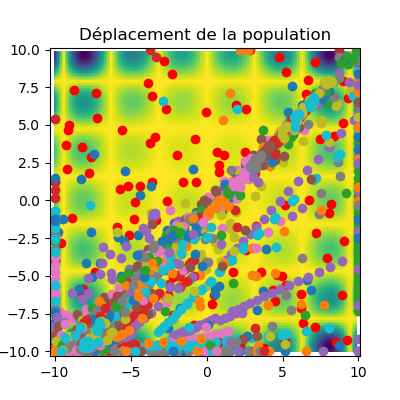

/usr/lib/python3/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


[-8.05501503 -9.66461183] -19.208502562431942 50


In [37]:
n=100
A = initialise_pop(n,-10,10)

a,b,t=w_decroissant_animation(holder_table,A,50, 0.7, 0.4, precision,0.4,1)
print(a,b,t)

## 5.2 Animation avec une petite population

<IPython.core.display.Javascript object>


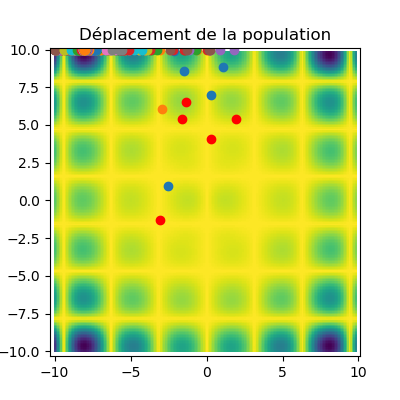

/usr/lib/python3/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


(array([-8.05132858, 10.        ]), -18.020715689596937, 42)


In [38]:
A = initialise_pop(5,inf,sup)
res3 = w_decroissant_animation(holder_table,A,50, 0.7, 0.4, precision,0.4,1)
print(res3)